In [106]:
import pickle

with open('cleaned_data.pkl', 'rb') as f:
    df = pickle.load(f)


In [107]:
#Required Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

#Logisitc Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [108]:
df.head()


,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Outcome Variable_Negative,Outcome Variable_Positive,Disease
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,56
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,24
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,37
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,37


In [109]:
df = pd.read_csv('D:\money\data analytics _ml\AI powered doctor self\AI-powered-doctor-assistant\dataset\Disease_symptom_and_patient_profile_dataset.csv')

In [110]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [111]:
NUMERICAL_FEATURES = []
CATEGORICAL_FEATURES = []

for name in df.columns:
    if df[name].dtype == 'object':
        CATEGORICAL_FEATURES.append(name)
    else:
        NUMERICAL_FEATURES.append(name)

CATEGORICAL_FEATURES.remove('Outcome Variable')
FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
print(FEATURES)


['Age', 'Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level']


In [112]:
#Creating a preprocessor
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ]
)

In [113]:
X = df[FEATURES]
y = df['Outcome Variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#Loading models
models = {
    'Standard Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'L1 Regularized Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42),
    'SGD': SGDClassifier(loss='modified_huber', random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
}

In [115]:
#Training and Evaluating the models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    try:
        y_pred_proba = pipeline.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_pred_proba)
    except:
        auc = None

    print(f"\nResults for {name}:")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if auc:
        print(f"ROC-AUC Score: {auc:.4f}")
    print('----------------------------------------------------------')


Results for Standard Logistic Regression:

Confusion Matrix:
[[17 13]
 [15 25]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.57      0.55        30
    Positive       0.66      0.62      0.64        40

    accuracy                           0.60        70
   macro avg       0.59      0.60      0.59        70
weighted avg       0.60      0.60      0.60        70

----------------------------------------------------------

Results for L1 Regularized Logistic Regression:

Confusion Matrix:
[[16 14]
 [16 24]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.53      0.52        30
    Positive       0.63      0.60      0.62        40

    accuracy                           0.57        70
   macro avg       0.57      0.57      0.57        70
weighted avg       0.58      0.57      0.57        70

----------------------------------------------------------

Results for

In [116]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome Variable'], axis=1)
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [117]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature categories
binary_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
categorical_cols = ['Blood Pressure', 'Cholesterol Level', 'Gender']
numerical_cols = ['Age']

# Define transformers
ordinal_transformer = OrdinalEncoder(categories=[['No', 'Yes']] * len(binary_cols))
onehot_transformer = OneHotEncoder(drop='first')
scaler = StandardScaler()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', ordinal_transformer, binary_cols),
        ('categorical', onehot_transformer, categorical_cols),
        ('scaler', scaler, numerical_cols)
    ]
)

In [118]:
onehot_encoder = OneHotEncoder()

In [119]:
X_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.transform(X_test)

In [120]:
y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_test_reshaped = np.array(y_test).reshape(-1, 1)

# Fit and transform the training data
y_train_encoded = onehot_encoder.fit_transform(y_train_reshaped)

# Transform the test data
y_test_encoded = onehot_encoder.transform(y_test_reshaped)

In [121]:
X = df.drop(['Outcome Variable'], axis= 1)
y = df['Outcome Variable']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [123]:
def compare_algorithms(X_train, y_train, algorithms, cv=5, scoring='accuracy'):
    results = {}
    
    for name, algorithm in algorithms.items():
        # Perform cross-validation
        scores = cross_val_score(algorithm, X_train, y_train, cv=cv, scoring=scoring)
        
        # Store the mean and standard deviation of the scores
        results[name] = {
            'mean_accuracy': np.mean(scores),
            'std_accuracy': np.std(scores)
        }
        
        # Print the results for each algorithm
        print(f"{name} - Mean Accuracy: {results[name]['mean_accuracy']:.4f} | Std Accuracy: {results[name]['std_accuracy']:.4f}")
    
    return results

In [124]:
def plot_accuracies(accuracies):
    """
    Plots the mean accuracies and their standard deviations for different algorithms.
    
    Parameters:
    accuracies (dict): A dictionary where keys are algorithm names and values are dictionaries
                       containing 'mean_accuracy' and 'std_accuracy'.
    """
    # Extracting algorithm names, mean accuracies, and standard deviations
    names = list(accuracies.keys())
    mean_accuracies = [accuracies[name]['mean_accuracy'] for name in names]
    std_accuracies = [accuracies[name]['std_accuracy'] for name in names]
    
    # Creating the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(names, mean_accuracies, yerr=std_accuracies, capsize=5, color='skyblue', alpha=0.7)
    
    # Adding plot details
    plt.xlabel('Algorithms')
    plt.ylabel('Mean Accuracy')
    plt.title('Algorithm Comparison: Mean Accuracy with Standard Deviation')
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [125]:
df
X_test

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
88,Migraine,No,Yes,Yes,No,35,Male,High,High
83,Kidney Cancer,No,No,Yes,No,35,Male,High,High
267,Osteoporosis,Yes,No,Yes,No,55,Female,Normal,Normal
102,Liver Cancer,Yes,Yes,No,No,38,Female,High,Normal
270,Typhoid Fever,No,Yes,No,No,55,Male,Normal,Low
...,...,...,...,...,...,...,...,...,...
263,Osteoarthritis,Yes,Yes,No,No,55,Female,High,High
210,Crohn's Disease,Yes,Yes,Yes,No,50,Male,Normal,High
231,Klinefelter Syndrome,No,No,Yes,No,50,Female,Normal,Normal
154,Urinary Tract Infection,No,Yes,Yes,Yes,42,Female,Normal,Low


In [126]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train_transformed,y_train)

LogisticRegression()

In [127]:
from sklearn.metrics import accuracy_score
# predicting values and checking accuracy
lpred = lreg.predict(x_test_transformed)
accuracy_score(lpred , y_test)

0.4714285714285714

In [128]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn = KNeighborsClassifier()
knn.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [130]:
kpred = knn.predict(x_test_transformed)
accuracy_score(kpred,y_test)

0.4714285714285714

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [132]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on test data
accuracy = pipeline.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.70


In [133]:
from sklearn.model_selection import cross_val_score

# Define the algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0)
}

# Compare the algorithms
results = compare_algorithms(preprocessor.fit_transform(X_train), y_train, algorithms)

Logistic Regression - Mean Accuracy: 0.6486 | Std Accuracy: 0.0857
K-Nearest Neighbors - Mean Accuracy: 0.5843 | Std Accuracy: 0.0357
Random Forest - Mean Accuracy: 0.6526 | Std Accuracy: 0.0472


In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_transformed,y_train)
rfpred = rf.predict(x_test_transformed) 
accuracy_score(rfpred,y_test)

0.5571428571428572

In [135]:
# compare algorithms and model with accuracy highest score
# give code to plot bar graph of accuracies of all models
import matplotlib.pyplot as plt
def compare_algorithms(X_train, y_train, algorithms, cv=5, scoring='accuracy'):
    results = {}
    
    for name, algorithm in algorithms.items():
        # Perform cross-validation
        scores = cross_val_score(algorithm, X_train, y_train, cv=cv, scoring=scoring)
        
        # Store the mean and standard deviation of the scores
        results[name] = {
            'mean_accuracy': np.mean(scores),
            'std_accuracy': np.std(scores)
        }
        
        # Print the results for each algorithm
        print(f"{name} - Mean Accuracy: {results[name]['mean_accuracy']:.4f} | Std Accuracy: {results[name]['std_accuracy']:.4f}")
    
    return results



Standard Logistic Regression - Mean Accuracy: 0.6486 | Std Accuracy: 0.0857
L1 Regularized Logistic Regression - Mean Accuracy: 0.6523 | Std Accuracy: 0.0753
ElasticNet - Mean Accuracy: 0.6201 | Std Accuracy: 0.1211
SGD - Mean Accuracy: 0.5376 | Std Accuracy: 0.0086
Random Forest Classifier - Mean Accuracy: 0.6527 | Std Accuracy: 0.0556
Gradient Boosting Classifier - Mean Accuracy: 0.6738 | Std Accuracy: 0.0133
SVM - Mean Accuracy: 0.5340 | Std Accuracy: 0.0034


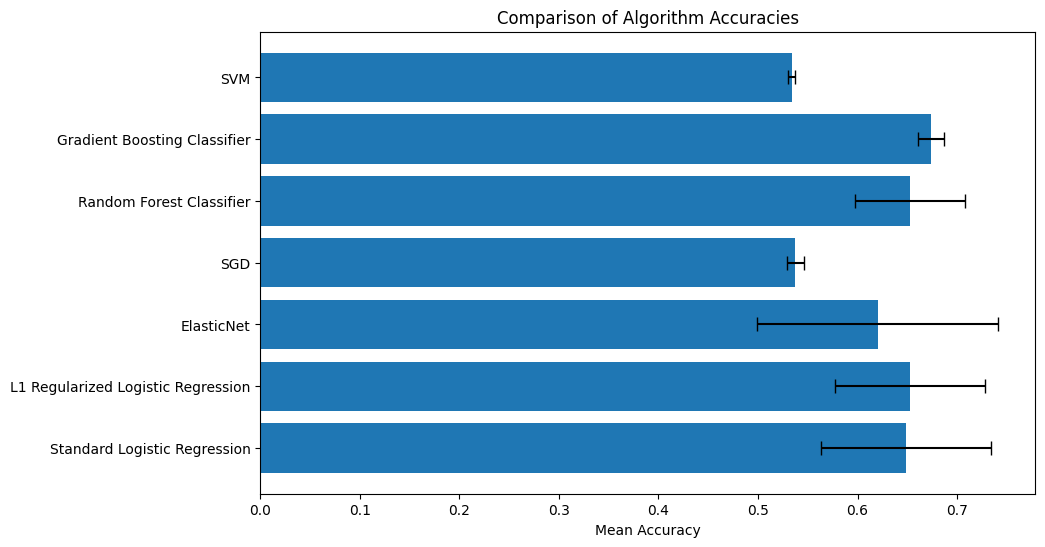

In [136]:
def plot_accuracies(accuracies):
    """
    Plots the mean accuracies and their standard deviations for different algorithms.
    """
    names = list(accuracies.keys())
    mean_accuracies = [accuracies[name]['mean_accuracy'] for name in names]
    std_accuracies = [accuracies[name]['std_accuracy'] for name in names]

    plt.figure(figsize=(10, 6))
    plt.barh(names, mean_accuracies, xerr=std_accuracies, capsize=5)
    plt.xlabel("Mean Accuracy")
    plt.title("Comparison of Algorithm Accuracies")
    plt.show()
accuracies = compare_algorithms(preprocessor.fit_transform(X_train), y_train, models)
plot_accuracies(accuracies)

In [137]:
# save my random forest model in pickle file
model_filename = 'finalized_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)
print(f"Model successfully saved as '{model_filename}'")



Model successfully saved as 'finalized_model.pkl'
